The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

n:             20
avg precision:  0.760
avg recall:     0.411



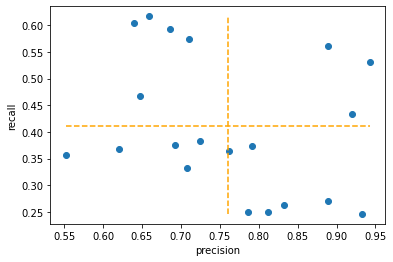

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import torch


classify_path = Path('/mnt/data/factcheck/tweets/classify')
res_path = Path(classify_path, 'metrics', 'results.txt')

def load_line(file):
    text = next(file)
    return json.loads(text)
    
test, valid = [], []
val_prec, val_recs = [], []
n = 0
with open(res_path, 'rt') as f:
    while True:
        try:
            t, v, _ = load_line(f), load_line(f), next(f)
        except StopIteration:
            break
        n += 1
        test.append(t)
        valid.append(v)
        val_prec.append(v['precision'])
        val_recs.append(v['recall'])
        
valprecs = np.array(val_prec, dtype=float)
valrecls = np.array(val_recs, dtype=float)
    
print()
print('n:            ', f'{n:>1d}')
print('avg precision: ', f'{valprecs.mean():>.3f}')
print('avg recall:    ', f'{valrecls.mean():>.3f}')
print()

plt.scatter(valprecs, valrecls)
plt.plot((valprecs.min(), valprecs.max()), (valrecls.mean(), valrecls.mean()), 
         linestyle='--', color='orange')
plt.plot((valprecs.mean(), valprecs.mean()), (valrecls.min(), valrecls.max()), 
         linestyle='--', color='orange')
plt.xlabel('precision')
plt.ylabel('recall')
plt.show()